# Worksheet 6 - Classification

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Recognize situations where a simple classifier would be appropriate for making predictions.
* Explain the k-nearest neighbour classification algorithm.
* Interpret the output of a classifier.
* Compute, by hand, the distance between points when there are two explanatory variables/predictors.
* Describe what a training data set is and how it is used in classification.
* In a dataset with two explanatory variables/predictors, perform k-nearest neighbour classification in R using `caret::train(method = "knn", ...)` to predict the class of a single new observation.

This worksheet covers parts of [Chapter 6](https://ubc-dsci.github.io/introduction-to-datascience/classification.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
 ### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(caret)
source('tests_worksheet_06.R')
source('cleanup_worksheet_06.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null



**Question 0.1** Multiple Choice: 
<br> {points: 1}

**Which of the following statements is NOT true of a training data set (in the context of classification)?**

A. A training data set is a collection of observations for which we know the true classes.

B. We can use a training set to explore and build our classifier.

C. The training data set is the underlying collection of observations for which we don't know the true classes.

*Assign your answer to an object called `answer0.1`.*

In [2]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer0.1 <- "C"

In [3]:
test_0.1()

[1] "Success!"


**Question 0.2** Multiple Choice
<br> {points: 1}

(Adapted from James et al, "[An introduction to statistical learning](http://www-bcf.usc.edu/~gareth/ISL/)" (page 53))

Consider the scenario below: 

We collect data on 20 similar products. For each product we have recorded whether it was a success or failure (labelled as such by the Sales team), price charged for the product, marketing budget, competition price, customer data, and ten other variables. 

**Which of the following is a classification problem?**

A. We are interested in comparing the profit margins for products that are a success and products that are a failure. 

B. We are considering launching a new product and wish to know whether it will be a success or a failure. 

C. We wish to group customers based on their preferences and use that knowledge to develop targeted marketing programs. 

*Assign your answer to an object called `answer0.2`.*

In [4]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer0.2 <- "B"

In [5]:
test_0.2()

[1] "Success!"


## 1. Breast Cancer Data Set 
We will work with the breast cancer data from this week's pre-reading. 

**Question 1.0**
<br> {points: 1}

Read the `clean-wdbc-data.csv` file (found in the `data` directory) into the notebook and store it as a data frame. Name it `cancer`.

In [8]:
# your code here
cancer <- read_csv("data/clean-wdbc-data.csv")
head(cancer)

Parsed with column specification:
cols(
  ID = col_double(),
  Class = col_character(),
  Radius = col_double(),
  Texture = col_double(),
  Perimeter = col_double(),
  Area = col_double(),
  Smoothness = col_double(),
  Compactness = col_double(),
  Concavity = col_double(),
  Concave_points = col_double(),
  Symmetry = col_double(),
  Fractal_dimension = col_double()
)


ID,Class,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,1.8850310,-1.35809849,2.3015755,1.9994782,1.3065367,2.6143647,2.1076718,2.2940576,2.7482041,1.9353117
842517,M,1.8043398,-0.36887865,1.5337764,1.8888270,-0.3752817,-0.4300658,-0.1466200,1.0861286,-0.2436753,0.2809428
84300903,M,1.5105411,-0.02395331,1.3462906,1.4550043,0.5269438,1.0819801,0.8542223,1.9532817,1.1512420,0.2012142
84348301,M,-0.2812170,0.13386631,-0.2497196,-0.5495377,3.3912907,3.8899747,1.9878392,2.1738732,6.0407261,4.9306719
84358402,M,1.2974336,-1.46548091,1.3373627,1.2196511,0.2203623,-0.3131190,0.6126397,0.7286181,-0.8675896,-0.3967505
843786,M,-0.1653528,-0.31356043,-0.1149083,-0.2441054,2.0467119,1.7201029,1.2621327,0.9050914,1.7525273,2.2398308


In [9]:
test_1.0()

[1] "Success!"


**Question 1.1** True or False: 
<br> {points: 1}

After looking at the first six rows of the `cancer` data fame, suppose we asked you to predict the variable "area" for a new observation. **Is this a classification problem?**

*Assign your answer (either "true" or "false") to an object called `answer1.1`.*

In [10]:
# Make sure the correct answer is written in lower-case (true / false)
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.1 <- "false"

In [11]:
test_1.1()

[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Create a scatterplot of the data with `Symmetry` on the x-axis and `Radius` on the y-axis. Modify your aesthetics by colouring for `Class`. As you create this plot, ensure you follow the guidelines for creating effective visualizations.

*Assign your plot to an object called `cancer_plot`.*

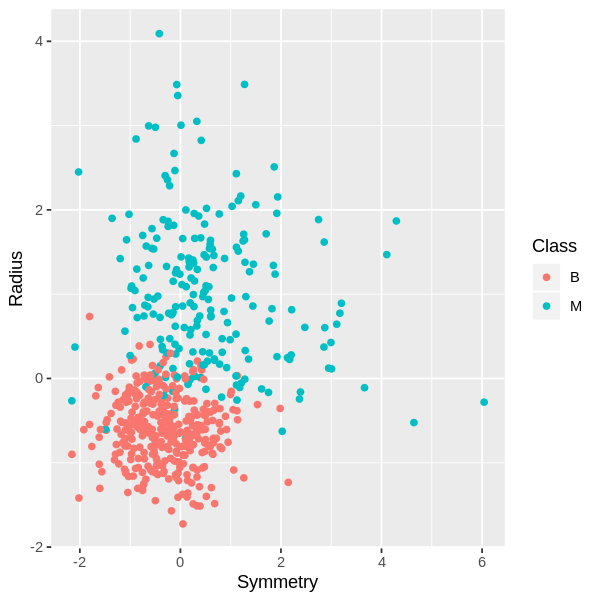

In [21]:
# your code here
options(repr.plot.width=5, repr.plot.height=5)
cancer_plot <- ggplot(cancer, aes(x = Symmetry, y = Radius, color = Class)) +
    geom_point() +
    labs(x = "Symmetry", y = "Radius")
cancer_plot

In [19]:
test_1.2()

[1] "Success!"


**Question 1.3** 
<br> {points: 1}

Just by looking at the scatterplot above, how would you classify an observation with symmetry 1 and radius 1?  
- Benign 
- Malignant

*Assign your answer to an object called `answer1.3`.*

In [22]:
# Make sure the correct answer is written fully (Benign / Malignant)
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.3 <- 'Malignant'

In [23]:
test_1.3()

[1] "Success!"


We will now compute the distance between the first and second observation in the breast cancer dataset using the explanatory variables/predictors `Symmetry` and `Radius`. Recall we can calculate the distance between two points using the following formula: 
$$Distance = \sqrt{(x_a -x_b)^2 + (y_a - y_b)^2}$$

**Question 1.4** 
<br> {points: 1}

First, extract the coordinates for the two observations and assign them to objects called: 

- `xa` (Symmetry value for the first row)
- `ya` (Radius value for the first row)
- `xb` (Symmetry value for the second row)
- `yb` (Radius value for the second row).

*Scaffolding for `xa` is given*

In [33]:
xa <- filter(cancer, row_number() == 1)  %>%  
   select(Symmetry) %>%
   unlist()

ya <- filter(cancer, row_number() == 1)  %>%  
   select(Radius) %>%
   unlist()

xb <- filter(cancer, row_number() == 2)  %>%  
   select(Symmetry) %>%
   unlist()

yb <- filter(cancer, row_number() == 2)  %>%  
   select(Radius) %>%
   unlist()
# your code here



In [34]:
test_1.4()

[1] "Success!"


**Question 1.5**
<br> {points: 1}

Plug the coordinates into the distance equation. 

*Assign your answer to an object called `answer1.5`.*

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.

In [35]:
answer1.5 <- sqrt((xa - xb)^2 + (ya - yb)^2)

# your code here

answer1.5

Symmetry 
2.992967

In [ ]:
test_1.5()

**Question 1.6**
<br> {points: 1}

Now we'll do the same thing *with 3 explanatory variables/predictors*: Symmetry, Radius and Concavity. Again, use the first two rows in the data set as the points you are calculating the distance between (point $a$ is row 1, and point $b$ is row 2).


Find the coordinates for the third variable (Concavity) and assign them to objects called `za` and `zb`. Use the scaffolding given in **Question 1.4** as a guide.

In [36]:
# your code here
za <- filter(cancer, row_number() == 1)  %>%  
   select(Concavity) %>%
   unlist()
zb <- filter(cancer, row_number() == 2)  %>%  
   select(Concavity) %>%
   unlist()

In [37]:
test_1.6()

[1] "Success!"


**Question 1.7**
<br> {points: 1}

Again, calculate the distance between the first and second observation in the breast cancer dataset using 3 explanatory variables/predictors: Symmetry, Radius and Concavity.

*Assign your answer to an object called `answer1.7`. Use the scaffolding given to calculate `answer1.5` as a guide.*

In [40]:
# your code here
answer1.7<-sqrt((xa - xb)^2 + (ya - yb)^2 + (za - zb)^2)
answer1.7

Symmetry 
3.746957

In [41]:
test_1.7()

[1] "Success!"


**Question 1.8**
<br> {points: 1}

Let's do this without explicitly making coordinate variables!

Create a vector of the coordinates for each point. Name one vector `point_a` and the other vector `point_b`. Within the vector, the order of coordinates should be: `Symmetry`, `Radius`, `Concavity`.

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.

In [42]:
point_a <- filter(cancer, row_number() == 1) %>%
   select(Symmetry, Radius, Concavity) %>%
   unlist()
point_b <- filter(cancer, row_number() == 2) %>%
   select(Symmetry, Radius, Concavity) %>%
   unlist()

# This is only the scaffolding for one vector (you need to make another one for row number 2)

# your code here

point_a
point_b

Symmetry    Radius Concavity 
 2.748204  1.885031  2.107672

Symmetry     Radius  Concavity 
-0.2436753  1.8043398 -0.1466200

In [43]:
test_1.8()

[1] "Success!"


**Question 1.9**
<br> {points: 1}

Calculate the differences between the two vectors, `point_a` and `point_b`. The result should be a vector of length 3 named `difference`.

In [44]:
# your code here
difference <- point_a - point_b
difference

Symmetry     Radius  Concavity 
2.99187937 0.08069119 2.25429178

In [45]:
test_1.9()

[1] "Success!"


**Question 1.10**
<br> {points: 1}

Square the differences between the two vectors, `point_a` and `point_b`. The result should be a vector of length 3 named `dif_square`. *Hint: `^` is the exponent symbol in R.*

In [47]:
# your code here
dif_square <- difference^2
dif_square

Symmetry      Radius   Concavity 
8.951342184 0.006511068 5.081831410

In [ ]:
test_1.10()

**Question 1.10.1**
<br> {points: 1}

Sum the squared differences between the two vectors, `point_a` and `point_b`. The result should be a double named `dif_sum`. 

*Hint: the `sum` function in R returns the sum of the elements of a vector*

In [48]:
# your code here
dif_sum <- sum(dif_square)
dif_sum 

[1] 14.03968

In [49]:
test_1.10.1()

[1] "Success!"


**Question 1.10.2**
<br> {points: 1}

Square root the sum of your squared differences. The result should be a double named `root_dif_sum`. 

In [50]:
# your code here
root_dif_sum <- sqrt(dif_sum)
root_dif_sum

[1] 3.746957

In [51]:
test_1.10.2()

[1] "Success!"


**Question 1.10.3**
<br> {points: 1}

If we have more than a few points, calculating distances as we did in the previous questions is VERY slow. Let's use the `dist()` function to find the distance between the first and second observation in the breast cancer dataset using Symmetry, Radius and Concavity. 

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.

*Assign your answer to an object called `dist_cancer_two_rows`.*

In [66]:
dist_cancer_two_rows <- head(cancer, 2)  %>% 
   select(Symmetry, Radius, Concavity)  %>% 
   dist()

# your code here
dist_cancer_two_rows

         1
2 3.746957

In [53]:
test_1.10.3()

[1] "Success!"


**Question 1.10.4** True or False: 
<br> {points: 1}

Compare `answer1.7`, `root_dif_sum`, and `dist_cancer_two_rows`. 

**Are they all the same value?** 

*Assign your answer (either "true" or "false") to an object called `answer1.10.4`*

In [64]:
# Make sure the correct answer is written in lower-case (true / false)
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.10.4<-'true'

In [65]:
test_1.10.4()

[1] "Success!"


## 2. Classification - A Simple Example Done Manually

**Question 2.0.0**
<br> {points: 1}

Let's take a random sample of 5 observations from the breast cancer dataset using the `sample_n` function. To make this random sample reproducible, we will use `set.seed(2)`. This means that the random number generator will start at the same point each time when we run the code and we will always get back the same random samples. 

We will focus on the predictors Symmetry and Radius only. Thus, we will need to select the columns `Symmetry` and `Radius` and `Class`. Save these 5 rows and 3 columns to a data frame named `small_sample`.

Fill in the `...` in the scaffolding provided below.

In [86]:
set.seed(2)                           
small_sample <- sample_n(cancer, 5) %>%  
   select(Symmetry, Radius, Class) 

# your code here
small_sample

Symmetry,Radius,Class
<dbl>,<dbl>,<chr>
0.28164122,-0.6660519,B
-0.73666457,-1.2619253,B
-0.10951751,2.4664213,M
-0.08042306,-0.7777782,B
2.47503955,0.6063860,M


In [87]:
test_2.0.0()

[1] "Success!"


**Question 2.0.1**
<br> {points: 1}
Finally, create a scatter plot where `Symmetry` is on the x-axis, and `Radius` is on the y-axis. Color the points by `Class`. Name your plot `small_sample_plot`

Fill in the `...` in the scaffolding provided below.

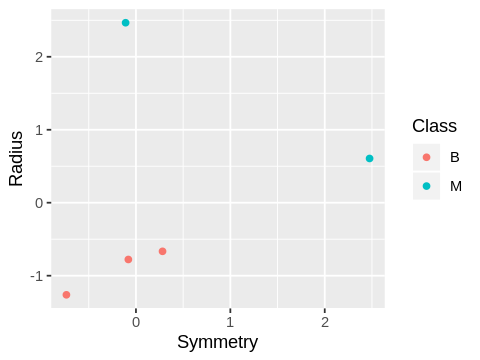

In [88]:
options(repr.plot.width=4,repr.plot.height=3)
small_sample_plot <- small_sample %>%   
   ggplot(aes(x=Symmetry,y=Radius,color=Class)) + 
       geom_point() +
       labs(x="Symmetry",y="Radius",color="Class")

# your code here

small_sample_plot

In [89]:
test_2.0.1()

[1] "Success!"


**Question 2.1** 
<br> {points: 1}

Suppose we are interested in classifying a new observation with `Symmetry = 0` and `Radius = 0.25`, but unknown `Class`. Using the `small_sample` data frame, add another row with `Symmetry = 0`, `Radius = 0.25`, and `Class = "unknown"`.

Fill in the `...` in the scaffolding provided below.

*Assign your answer to an object called `newData`.*

In [92]:
newData <- small_sample %>%
   add_row(Symmetry = 0, Radius = 0.25, Class = "unknown")

# your code here

newData

Symmetry,Radius,Class
<dbl>,<dbl>,<chr>
0.28164122,-0.6660519,B
-0.73666457,-1.2619253,B
-0.10951751,2.4664213,M
-0.08042306,-0.7777782,B
2.47503955,0.6063860,M
0.00000000,0.2500000,unknown


In [93]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br> {points: 1}

Compute the distance between each pair of the 6 observations in the `newData` dataframe using the `dist()` function based on two variables: `Symmetry` and `Radius`. Fill in the `...` in the scaffolding provided below.


*Assign your answer to an object called `dist_matrix`.*

In [100]:
# Select the Symmetry and Radius variables
# Calculate distance between all pairs of observations.
# Store it as a 6 x 6 matrix called dist_matrix

dist_matrix <- newData %>%
   select(Symmetry, Radius) %>% 
   dist()  %>%                   
   as.matrix()

# your code here

dist_matrix

1,2,3,4,5,6
0.0000000,1.1798355,3.156801,0.3789107,2.535763,0.9583699
1.1798355,0.0000000,3.780725,0.8155068,3.715593,1.6818421
3.1568012,3.7807251,0.000000,3.2443300,3.184284,2.2191254
0.3789107,0.8155068,3.244330,0.0000000,2.906252,1.0309199
2.5357631,3.7155929,3.184284,2.9062518,0.000000,2.5005663
0.9583699,1.6818421,2.219125,1.0309199,2.500566,0.0000000


In [98]:
test_2.2()

[1] "Success!"


**Question 2.3** Multiple Choice:
<br> {points: 1}

In the table above, the row and column numbers reflect the row number from the data frame the `dist` function was applied to. Thus numbers 1 - 5 were the points/observations from rows 1 - 5 in the `small_sample` data frame. Row 6 was the new observation that we do not know the diagnosis class for.  The values in `dist_matrix` are the distances between the points of the row and column number. For example, the distance between the point 2 and point 4 is 0.8155068. And the distance between point 3 and point 3 (the same point) is 0.

**Which observation is the nearest to our new point?**

*Assign your answer to an object called `answer2.3`.*

In [101]:
# Make sure the correct answer is a number
# Surround your answer with quotation marks (e.g. "8")
# Replace the fail() with your answer. 

# your code here
answer2.3<-"1"

In [102]:
test_2.3()

[1] "Success!"


**Question 2.4** Multiple Choice: 
<br> {points: 1}

Use the K-nearest neighbour classification algorithm with K = 1 to classify the new observation using your answers to **Questions 2.2 & 2.3**. Is the new data point predicted to be benign or malignant?

*Assign your answer to an object called `answer2.4`.*

In [103]:
# Make sure the correct answer is written fully ("Benign" / "Malignant")
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer2.4<-"Benign"

In [104]:
test_2.4()

[1] "Success!"


**Question 2.5** Multiple Choice:
<br> {points: 1}

Using your answers to **Questions 2.2 & 2.3**, what are the three closest observations to your new point?

A. 1, 3, 2

B. 1, 4, 2

C. 5, 2, 4

D. 3, 4, 2

*Assign your answer to an object called `answer2.5`.*

In [106]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks (e.g. "F")
# Replace the fail() with your answer. 

# your code here
answer2.5<-'B'

In [107]:
test_2.5()

[1] "Success!"


**Question 2.6** Multiple Choice: 
<br> {points: 1}

We will now use the K-nearest neighbour classification algorithm with K = 3 to classify the new observation using your answers to **Questions 2.2 & 2.3**. Is the new data point predicted to be benign or malignant?

*Assign your answer to an object called `answer2.6`.*

In [108]:
# Make sure the correct answer is written fully ("Benign" / "Malignant")
# Surround your answer with quotation marks
# Replace the fail() with your answer. 

# your code here
answer2.6<-'Benign'

In [109]:
test_2.6()

[1] "Success!"


**Question 2.7**
<br> {points: 1}

Compare your answers in 2.4 and 2.6. Are they the same?

*Assign your answer (either "yes" or "no") to an object called `answer2.7`.*

In [110]:
# Make sure the correct answer is written in lower-case ("yes" / "no")
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer2.7<-'yes'

In [111]:
test_2.7()

[1] "Success!"


## 3. Using `caret` to perform k-nearest neighbours

Now that we understand how K-nearest neighbours classification works, let's get familar with the `caret` R package so we can run classification analyses faster and with fewer errors. 

We'll again focus on `Radius` and `Symmetry` as the two predictors. This time, we would like to predict the class of a new observation with `Symmetry = 1` and `Radius = 0`. This one is a bit tricky to do visually from the plot below, and so is a motivating example for us to compute the prediction using k-nn with the `caret` package. Let's use `K = 7`.



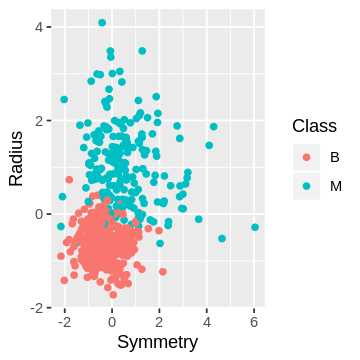

In [115]:
options(repr.plot.width = 3, repr.plot.height = 3)
cancer_plot

**Question 3.0**
<br> {points: 1}

Using the `cancer` data, create the two objects needed to train a model using the `caret` package:

1. A `data.frame` containing the predictors `Symmetry` and `Radius`, and 
2. A `vector` containing the `Class`.

Name the `data.frame` containing the predictors `X_train` and the `vector` containing the classes/labels `Y_train`.

Hints:
- use the `data.frame` function which makes `tibble`s into `data.frame`s
- use the `unlist` function to make a single column `tibble` into a vector

In [141]:
# your code here
X_train<- cancer%>%
    select(Symmetry,Radius) %>%
    data.frame()

Y_train<- cancer %>%
    select(Class) %>%
    unlist()

head(X_train)
head(Y_train)

Symmetry,Radius
<dbl>,<dbl>
2.7482041,1.8850310
-0.2436753,1.8043398
1.1512420,1.5105411
6.0407261,-0.2812170
-0.8675896,1.2974336
1.7525273,-0.1653528


Class1 Class2 Class3 Class4 Class5 Class6 
   "M"    "M"    "M"    "M"    "M"    "M"

In [130]:
test_3.0()

[1] "Success!"


**Question 3.1** 
<br> {points: 1}

Next, use the `train` function to train the K-nearest neighbours model. Make sure you pass the correct arguments to tell `caret` what columns are the predictors and which is the target/outcome, as well as the value of `K` we are using. Save the output as an object called `model_knn`.

*Note: because `caret` is designed to make it easy to try a few different values of `K`, you need to specify `K` as a `data.frame`. We have provided the scaffolding for you to do this below.*

In [138]:
k <- data.frame(k = 7)
model_knn <- train(x = X_train, y = Y_train, method = 'knn', tuneGrid = k)

# your code here

print(model_knn)

k-Nearest Neighbors 

569 samples
  2 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 569, 569, 569, 569, 569, 569, ... 
Resampling results:

  Accuracy   Kappa    
  0.9166821  0.8205204

Tuning parameter 'k' was held constant at a value of 7


In [139]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 1}

Create a `data.frame` with our single new observation (`Symmetry = 1` and `Radius = 0`), naming it `new_obs`. Predict the label of the new observation using the `predict` function. Store the output of `predict` in an object called `predicted_knn_7`.

In [142]:
new_obs <- data.frame(Symmetry=1, Radius=0)
predicted_knn_7 <- predict(object = model_knn, new_obs)

# your code here

print(predicted_knn_7)

[1] M
Levels: B M


In [143]:
test_3.2()

[1] "Success!"


Looking back at the plot (shown again below), is this what you would have been able to guess visually? And do you think `K = 7` was the "best" value to choose? Think on this, and we will discuss it next week. No answer is required in this worksheet.

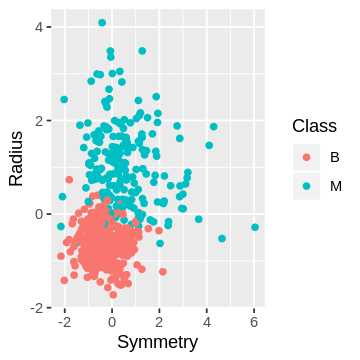

In [144]:
cancer_plot

**Question 3.3**
<br> {points: 1}

Perform K-nearest neighbour classification again, using the `caret` package and `K=7` to classify a new observation where we measure `Symmetry = 1`, `Radius = 0` and `Concavity = 1`. 

- store the training predictors in an object called `X_train_3`
- store the training labels in an object called `Y_train_3`
- store the output of `train` in an object called `model_knn_3`
- store the new observation in an object called `new_obs_3`
- store the output of `predict` in an object called `predicted_3_knn_7`

In [145]:
# your code here
X_train_3<- cancer %>%
    select(Symmetry, Radius, Concavity)
    data.frame()

Y_train_3<- cancer %>%
    select(Class) %>%
    unlist()

model_knn_3<- train(x = X_train_3, y = Y_train_3, method = 'knn', tuneGrid = data.frame(k = 7))

new_obs_3<- data.frame(Symmetry = 1, Radius = 0, Concavity = 1)
predicted_3_knn_7<- predict(object = model_knn_3, new_obs_3)

print(predicted_3_knn_7)

<0 x 0 matrix>

Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is depr

[1] M
Levels: B M


In [146]:
test_3.3()

[1] "Success!"


**Question 3.4**
<br> {points: 1}

Finally, perform K-nearest neighbour classification again, using the `caret` package and `K = 7` to classify a new observation where we have measurements for all the predictors in our training data set (we give you the values in the code below). 

- store the training predictors in an object called `X_train_all`
- store the training labels in an object called `Y_train_all`
- store the output of `train` in an object called `model_knn_all`
- store the new observation in an object called `new_obs_all`
- store the output of `predict` in an object called `predicted_all_knn_7`

*Hint: ID is not a measurement, but a label for each observation. Thus, do not include this in your analysis.*

In [149]:
new_obs_all <- data.frame(Radius = 0, 
                        Texture = 0, 
                        Perimeter = 0, 
                        Area = 0, 
                        Smoothness = 0.5, 
                        Compactness = 0,
                        Concavity = 1,
                        Concave_points = 0,
                        Symmetry = 1, 
                        Fractal_dimension = 0)


# your code here
X_train_all<- cancer %>%
    select(-ID,-Class)

Y_train_all<- cancer %>%
    select(Class) %>%
    unlist()

model_knn_all<- train(x = X_train_all, y = Y_train_all, method = 'knn', tuneGrid = data.frame(k = 7))

predicted_all_knn_7<- predict(object=model_knn_all, new_obs_all)
print(predicted_all_knn_7)

Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is depr

[1] B
Levels: B M


In [150]:
test_3.4()

[1] "Success!"


## 4. Reviewing Some Concepts

We will conclude with two multiple choice questions to reinforce some key concepts when doing classification with K-nearest neighbours.

**Question 4.0**
<br> {points: 1}

In the K-nearest neighbours classification algorithm, we calculate the distance between the new observation (for which we are trying to predict the class/label/outcome) and each of the observations in the training data set so that we can:

A. Find the `K` nearest neighbours of the new observation

B. Assess how well our model fits the data

C. Find outliers

D. Assign the new observation to a cluster

Assign your answer (e.g. `"E"`) to an object called: `answer4.0`

In [151]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer4.0<-'A'

In [152]:
test_4.0()

[1] "Success!"


**Question 4.1**
<br> {points: 1}

In the K-nearest neighbours classification algorithm, we choose the label/class for a new observation by:

A. Taking the mean (average value) label/class of the K nearest neighbours 

B. Taking the median (middle value) label/class of the K nearest neighbours 

C. Taking the mode (value that appears most often) label/class of the K nearest neighbours 

Assign your answer (e.g., `"E"`) to an object called `answer4.1`

In [153]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer4.1<-'C'

In [154]:
test_4.1()

[1] "Success!"
